In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qucat import GUI

# Designing a classical microwave filter

In this application we show how QuCAT can be used to design classical microwave components. 
We study here a band pass filter made from two LC oscillators with the inductor inline and a capacitive shunt to ground.
we are interested in the loss rate of a LC resonator connected through this filter to a 50 $\Omega$ load, which could emulate a typical microwave transmission line.

![alt text](graphics/filter_circuit.png "")

We start by opening the GUI and building this circuit.

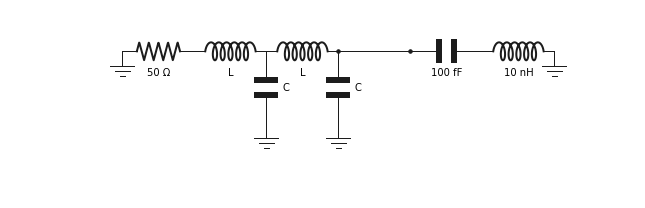

In [2]:
# Build circuit
filtered_cavity = GUI('circuits/filtered_cavity.txt', # location of the circuit file
        edit=True, # open the GUI to edit the circuit
        plot=True, # plot the circuit after having edited it
        print_network=False) # print the network

Since the values of $C$ and $L$ were not specified in the construction of the circuit, their values have to be passed as keyword arguments in subsequent functions.

To get an initial idea of the different modes of the circuit, let us display their resonance frequencies and dissipation rates for a 0.3uH inductance and 1pF capacitance.

In [10]:
f,k,A,chi = filtered_cavity.f_k_A_chi(pretty_print=True, L = 0.3e-6, C = 1e-12)

         mode |       freq.  |       diss.  |       anha.  |
            0 |      173 MHz |     18.8 MHz |          0Hz |
            1 |      464 MHz |     7.76 MHz |          0Hz |
            2 |     5.28 GHz |     68.2 mHz |          0Hz |

Kerr coefficients (diagonal = Kerr, off-diagonal = cross-Kerr)
         mode |         0    |         1    |         2    |
            0 |          0Hz |              |              |
            1 |          0Hz |          0Hz |              |
            2 |          0Hz |          0Hz |          0Hz |



Since the filter capacitance and inductance is large relative to the capacitance and inductance of the resonator, the two modes associated with the filter will have a much lower frequency, and very high dissipation rates. 

We can thus access the loss rate of the resonator by always selecting the last element of the array of loss rates returned by the function `loss_rates`

In [3]:
# The resonance modes of the filter
# have a very low quality factors, which make 
# them inadequate for quantization
# by default QuCAT will discard these modes
# and notify the user with a warning, here 
# we disactivate these warnings
filtered_cavity.warn_discarded_mode = False

# Build a list of inductances and capacitances
points = 31
C_list = np.logspace(-13.5,-11.8,points)
L_list = np.logspace(-8.5,-6.8,points)

# Initialize an array to store the resonator loss rates
k = np.zeros((points,points))

# Sweep over capacitances and inductances
for i,capacitance in enumerate(C_list):
    for j,inductance in enumerate(L_list):
        # Calculate loss rates (for all modes)
        k_all_modes = filtered_cavity.loss_rates(
                    C = capacitance, 
                    L = inductance)
        # Store the resonator loss rate
        k[i,j] = k_all_modes[-1]

C:\Anaconda3\lib\site-packages\qucat\core.py:2499: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(hbar/np.real(z)/np.imag(dY(z,**kwargs)))


The obtained dissipation rates are plotted below

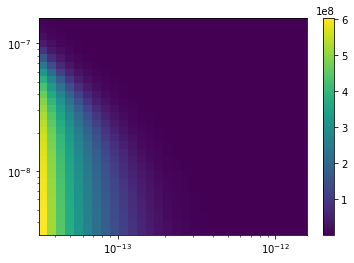

In [4]:
plt.pcolor(C_list,L_list,k)
cbar = plt.colorbar()
plt.xscale('log')
plt.yscale('log')